### WELCOME TO THE ANALYSIS OF A LENDING CLUB LOAN DATA

<h5>1. Importing Relevant libraries and Modules</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
#from datetime import datetime

In [2]:
#Remove Warnings
import warnings
warnings.filterwarnings("ignore")

<h5>2.Load your CSV File</h5>

In [3]:
loan_dataset = pd.read_csv("loan.csv", encoding= "ISO-8859-1") #The encoding is useful in this case

In [4]:
#create a shallow copy of this dataset so that our original would be unaffected
loan_dataset_cp = loan_dataset.copy(deep = True)

#### Inspect the data to know what we have

In [5]:
loan_dataset_cp.shape

(39717, 111)

In [6]:
loan_dataset_cp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Dropping Some Irrelevant Columns and Taking only the Ones we need

In [7]:
#let's know or let's see the columns we have in our dataset already

In [8]:
loan_dataset_cp.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [9]:
#or rather.., let's store it in an empty list
loan_dataset_columns = [column for column in loan_dataset_cp.columns]

In [10]:
len(loan_dataset_columns)

111

In [11]:
for column in loan_dataset_columns:
    print(column)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

In [12]:
'acc_now_delinq' in loan_dataset_columns

True

In [13]:
loan_dataset_columns.sort()

In [14]:
for columns in loan_dataset_columns:
    print(columns)

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
delinq_2yrs
delinq_amnt
desc
dti
dti_joint
earliest_cr_line
emp_length
emp_title
funded_amnt
funded_amnt_inv
grade
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
member_id
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
next_pymnt_d
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90

In [15]:
#Rather than dropping, which is more tedious let's carry the ones we need

In [16]:
#let's just drop regardless

In [17]:
loan_dataset_cp = loan_dataset_cp.drop([
'acc_now_delinq'
,'acc_open_past_24mths'
,'all_util'
,'annual_inc_joint'
,'application_type'
,'avg_cur_bal'
,'bc_open_to_buy'
,'bc_util'
,'chargeoff_within_12_mths'
,'collection_recovery_fee'
,'collections_12_mths_ex_med'
,'delinq_2yrs'
,'delinq_amnt'
,'desc'
,'dti_joint'
,'earliest_cr_line'
,'home_ownership'
,'id'
,'il_util'
,'initial_list_status'
,'inq_fi'
,'inq_last_12m'
,'max_bal_bc'
,'member_id'
,'mo_sin_old_il_acct'
,'mo_sin_old_rev_tl_op'
,'mo_sin_rcnt_rev_tl_op'
,'mo_sin_rcnt_tl'
,'mort_acc'
,'mths_since_last_delinq'
,'mths_since_last_major_derog'
,'mths_since_last_record'
,'mths_since_rcnt_il'
,'mths_since_recent_bc'
,'mths_since_recent_bc_dlq'
,'mths_since_recent_inq'
,'mths_since_recent_revol_delinq'
,'num_accts_ever_120_pd'
,'num_actv_bc_tl'
,'num_actv_rev_tl'
,'num_bc_sats'
,'num_bc_tl'
,'num_il_tl'
,'num_op_rev_tl'
,'num_rev_accts'
,'num_rev_tl_bal_gt_0'
,'num_sats'
,'num_tl_120dpd_2m'
,'num_tl_30dpd'
,'num_tl_90g_dpd_24m'
,'num_tl_op_past_12m'
,'open_acc_6m'
,'open_il_12m'
,'open_il_24m'
,'open_il_6m'
,'open_rv_12m'
,'open_rv_24m'
,'out_prncp'
,'out_prncp_inv'
,'pct_tl_nvr_dlq'
,'percent_bc_gt_75'
,'policy_code'
,'pymnt_plan'
,'recoveries'
,'tax_liens'
,'title'
,'tot_coll_amt'
,'tot_cur_bal'
,'tot_hi_cred_lim'
,'total_bal_ex_mort'
,'total_bal_il'
,'total_bc_limit'
,'total_cu_tl'
,'next_pymnt_d'
,'total_il_high_credit_limit'
,'total_pymnt'
,'total_pymnt_inv'
,'total_rec_int'
,'total_rec_late_fee'
,'total_rec_prncp'
,'verification_status_joint'
,'total_rev_hi_lim'
,'last_pymnt_amnt'
,'last_credit_pull_d'
,'url'], axis='columns')

In [18]:
loan_dataset_cp.shape

(39717, 26)

In [19]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0


In [20]:
#let's gain more insight into our data

In [21]:
loan_dataset_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [22]:
#let's take a look at the memory usage alright

In [23]:
loan_dataset_cp.memory_usage()

Index                      132
loan_amnt               317736
funded_amnt             317736
funded_amnt_inv         317736
term                    317736
int_rate                317736
installment             317736
grade                   317736
sub_grade               317736
emp_title               317736
emp_length              317736
annual_inc              317736
verification_status     317736
issue_d                 317736
loan_status             317736
purpose                 317736
zip_code                317736
addr_state              317736
dti                     317736
inq_last_6mths          317736
open_acc                317736
pub_rec                 317736
revol_bal               317736
revol_util              317736
total_acc               317736
last_pymnt_d            317736
pub_rec_bankruptcies    317736
dtype: int64

In [24]:
type(loan_dataset_cp.memory_usage())

pandas.core.series.Series

In [25]:
317736/1000

317.736

In [26]:
317/1000 * 26

8.242

#### Let's do a quick transformation using Apply/Map - Lambda
<p>This is Actually a little bit of feature Engineering</p>

In [27]:
loan_dataset_cp.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [28]:
#let's create a new column called defaulted that returns True(1) if it was charged off i.e. defaulted
#and False (0) if it was fully paid

In [29]:
loan_dataset_cp['defaulted'] = loan_dataset_cp['loan_status'].map(lambda x: 1 if x == 'Charged Off' else 0)
#this could also be like this alright
#loan_dataset_cp['defaulted'] = loan_dataset_cp['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [30]:
#observe, we can't see all the columns, let's set the pd options of the column so that we can see it

In [31]:
pd.options.display.max_columns = 30

In [32]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0


In [33]:
#Let's see some statistical analysis of this data

In [34]:
loan_dataset_cp.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,defaulted
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260,0.141677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324,0.348723
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,1.000000


In [35]:
type(loan_dataset_cp.describe())

pandas.core.frame.DataFrame

In [36]:
loan_dataset_cp.describe().loan_amnt

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [37]:
#general information of the dataset

In [38]:
loan_dataset_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

#### UNIVARIATE ANALYSIS

In [39]:
#Aim: To checkout the distribution of Loan Amounts and Funded Amounts

In [40]:
for values in loan_dataset_cp.columns:
    if values.endswith('amnt'):
        print(values)
    else:
        pass

loan_amnt
funded_amnt


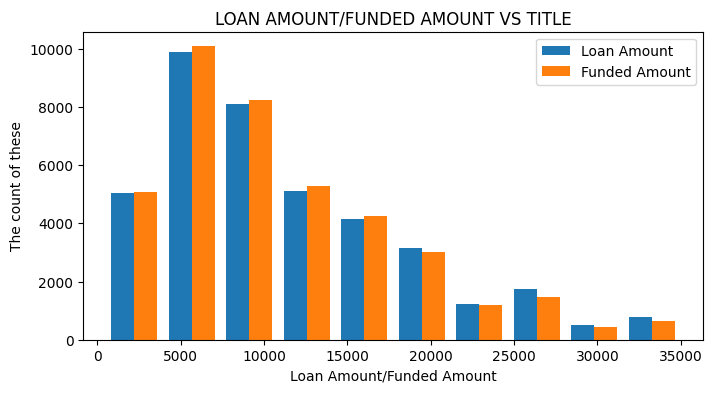

In [41]:
fig = plt.figure(figsize = (8,4))
plt.hist(x = [loan_dataset_cp.loan_amnt, loan_dataset_cp.funded_amnt], label = ['Loan Amount', 'Funded Amount'])
plt.xlabel("Loan Amount/Funded Amount")
plt.ylabel("The count of these")
plt.title("LOAN AMOUNT/FUNDED AMOUNT VS TITLE")
plt.legend()
fig.show()

##### Just a pivot_table analysis

In [42]:
#let's do average funded amount for defaulters and not defauotrers for the 36 and 60 months period

In [43]:
loan_dataset_cp.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_d', 'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

In [44]:
loan_dataset_cp.pivot_table(index = 'defaulted', columns = 'term', values = 'funded_amnt', aggfunc = 'mean')

term,36 months,60 months
defaulted,,
0,9495.432757,14966.135507
1,9258.064766,15108.583333


In [45]:
#let's get a visual representation or understanding of the amounnt of loans that was disbursed alright.

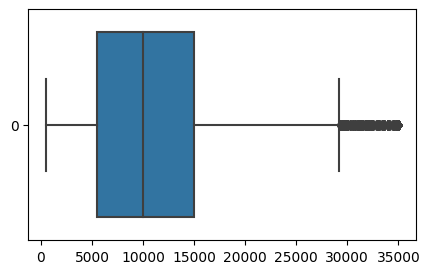

In [46]:
plt.figure(figsize = (5,3))
sns.boxplot(loan_dataset_cp.loan_amnt, orient = 'horizontal')
plt.show()

In [47]:
#let's examine the income of the defaulters and the non defaulter.., we could use pivot_table
#just to see probably the average

In [48]:
loan_dataset_cp.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0


In [49]:
loan_dataset_cp.pivot_table(index = 'defaulted', values = 'annual_inc', aggfunc = 'mean')

,annual_inc
defaulted,
0,70048.707623
1,62427.298034


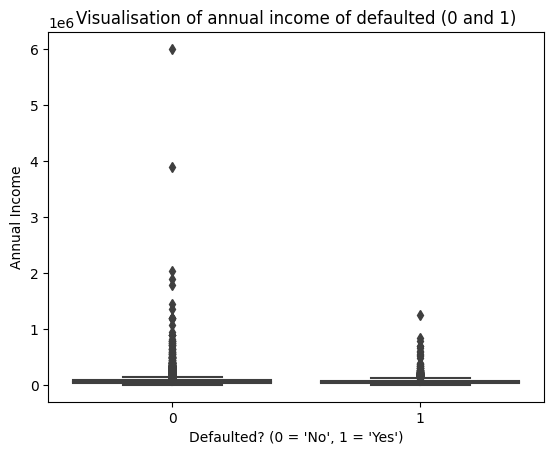

In [50]:
fig, ax = plt.subplots()
ax = sns.boxplot(x = 'defaulted', y = 'annual_inc', data = loan_dataset_cp)
ax.set_xlabel("Defaulted? (0 = 'No', 1 = 'Yes')")
ax.set_ylabel("Annual Income")
ax.set_title("Visualisation of annual income of defaulted (0 and 1)")
fig.show()

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax = sns.boxplot(x = 'defaulted', y = 'annual_inc', data = loan_dataset_cp)
# ax.set_xlabel("Defaulted? (0 = 'No', 1 = 'Yes')")
# ax.set_ylabel("Annual Income")
# ax.set_title("Visualisation of annual income of defaulted (0 and 1)")
# fig.show()

# plt.figure()
# sns.boxplot(x = 'defaulted', y = 'annual_inc', data = loan_dataset_cp)
# plt.xlabel("Defaulted? (0 = 'No', 1 = 'Yes')")
# plt.ylabel("Annual Income")
# plt.title("Visualisation of annual income of defaulted (0 and 1)")
# plt.show()

# plt.figure()
# plt.subplot(111)
# sns.boxplot(x = 'defaulted', y = 'annual_inc', data = loan_dataset_cp)
# plt.xlabel("Defaulted? (0 = 'No', 1 = 'Yes')")
# plt.ylabel("Annual Income")
# plt.title("Visualisation of annual income of defaulted (0 and 1)")
# plt.show()

### REMOVE OUTLIERS

In [51]:
#let's find out the total population we have for the annual income and see if we can
#take 99% out of it

In [52]:
total_annual_inc = loan_dataset_cp['annual_inc'].count()

In [53]:
top_99_total_annual_inc = round(total_annual_inc * 0.99)

In [54]:
top_99_total_annual_inc

39320

In [55]:
#so we could create a dataframe out of these 39320 values

In [56]:
loan_dataset_cp_temp = pd.DataFrame({'defaulted':loan_dataset_cp.defaulted, 'annual_inc':loan_dataset_cp.annual_inc})

In [57]:
top_99 = loan_dataset_cp_temp.sort_values(by = 'annual_inc').head(top_99_total_annual_inc)
top_99

,defaulted,annual_inc
35501,0,4000.0
29283,1,4080.0
30726,0,4200.0
37709,0,4200.0
36639,0,4800.0
...,...,...
3475,0,234000.0
33036,0,234000.0
37048,0,234600.0
29878,0,234996.0


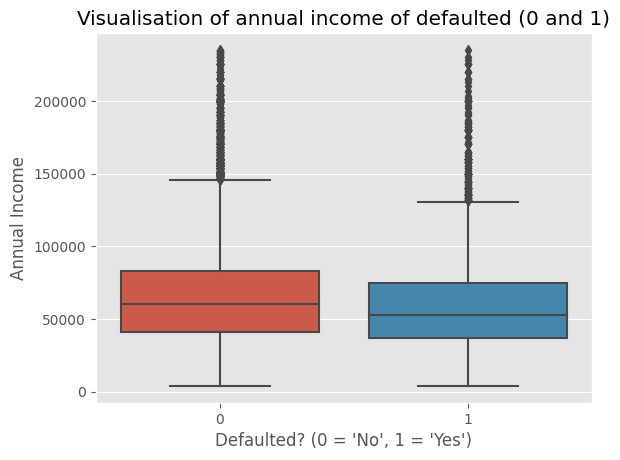

In [58]:
plt.figure()
plt.style.use('ggplot')
#we could also do: plt.style.use('seaborn')
sns.boxplot(x = 'defaulted', y = 'annual_inc', data = top_99)
plt.xlabel("Defaulted? (0 = 'No', 1 = 'Yes')")
plt.ylabel("Annual Income")
plt.title("Visualisation of annual income of defaulted (0 and 1)")
plt.show()

In [59]:
#let's try and take out top 5 % and repeat the whole visualization process again

In [60]:
top_95_total_annual_inc = round(total_annual_inc * 0.95)

In [61]:
top_95 = loan_dataset_cp_temp.sort_values(by = 'annual_inc').head(top_95_total_annual_inc)
top_95

,defaulted,annual_inc
35501,0,4000.0
29283,1,4080.0
30726,0,4200.0
37709,0,4200.0
36639,0,4800.0
...,...,...
29171,0,141600.0
28537,1,141996.0
29447,0,141996.0
17651,0,141996.0


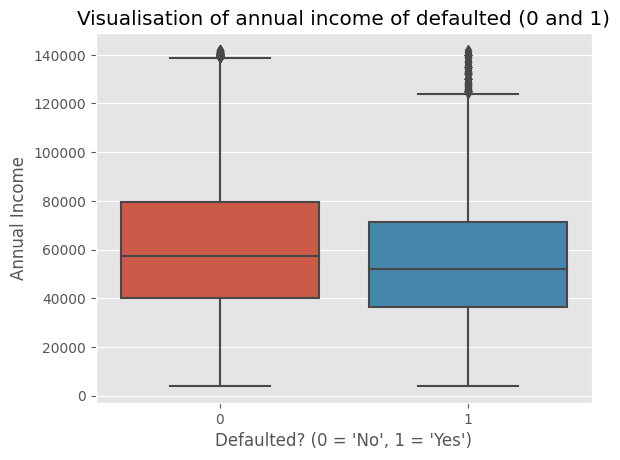

In [62]:
plt.figure()
plt.style.use('ggplot')
#we could also do: plt.style.use('seaborn')
sns.boxplot(x = 'defaulted', y = 'annual_inc', data = top_95)
plt.xlabel("Defaulted? (0 = 'No', 1 = 'Yes')")
plt.ylabel("Annual Income")
plt.title("Visualisation of annual income of defaulted (0 and 1)")
plt.show()

#No actual correlation between annual income to defaulters and non defaulters because their median values don't differ much

In [63]:
#Compare the distributions of three loan amounts fields the: loan_amnt, funded_amnt and funded_amnt_inv, let's see what insight it gives us

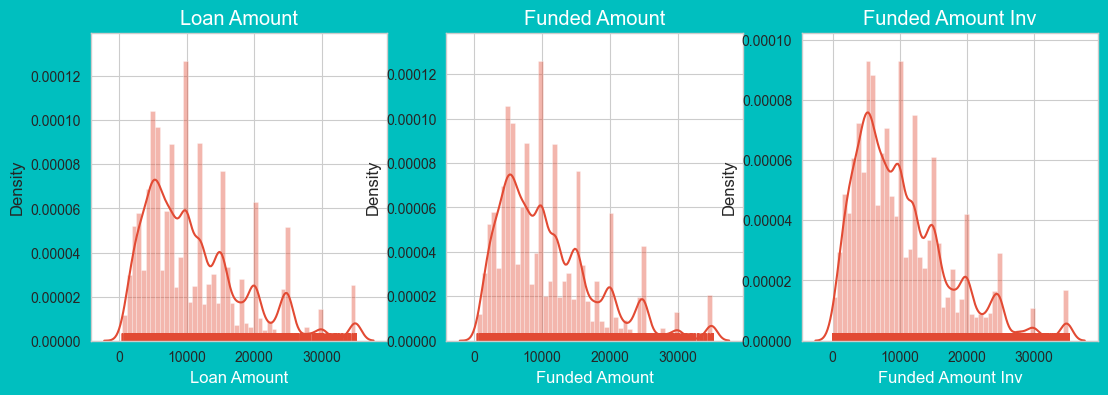

In [64]:
fig = plt.figure(facecolor = 'c', 
                figsize = (13,4)
                )
sns.set_style('whitegrid')

ax_1 = fig.add_subplot(131)
sns.distplot(loan_dataset_cp['loan_amnt'], ax = ax_1, rug = True)
ax_1.set_title("Loan Amount", color = 'white')
ax_1.set_xlabel("Loan Amount", fontsize = 12, color = 'white')

ax_2 = fig.add_subplot(132)
sns.distplot(loan_dataset_cp['funded_amnt'], ax = ax_2, rug = True)
ax_2.set_title("Funded Amount", color = 'white')
ax_2.set_xlabel("Funded Amount", fontsize = 12, color = 'white')

ax_3 = fig.add_subplot(133)
sns.distplot(loan_dataset_cp['funded_amnt_inv'], ax = ax_3, rug = True)
ax_3.set_title("Funded Amount Inv", color = 'white')
ax_3.set_xlabel("Funded Amount Inv", fontsize = 12, color = 'white')

# fig.tight_layout()
fig.show()

#I'm not really sure of what all these mean sha

In [65]:
#since interest rate is already, we know it's a percentage.., should we do the converted one.., let's take a look alright

In [66]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0


In [67]:
type(loan_dataset_cp['int_rate'][0])

str

In [68]:
loan_dataset_cp['int_rate_converted'] = loan_dataset_cp['int_rate'].str.strip('%').astype(float)

In [69]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted,int_rate_converted
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0,10.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1,15.27
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0,15.96
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0,13.49
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0,12.69


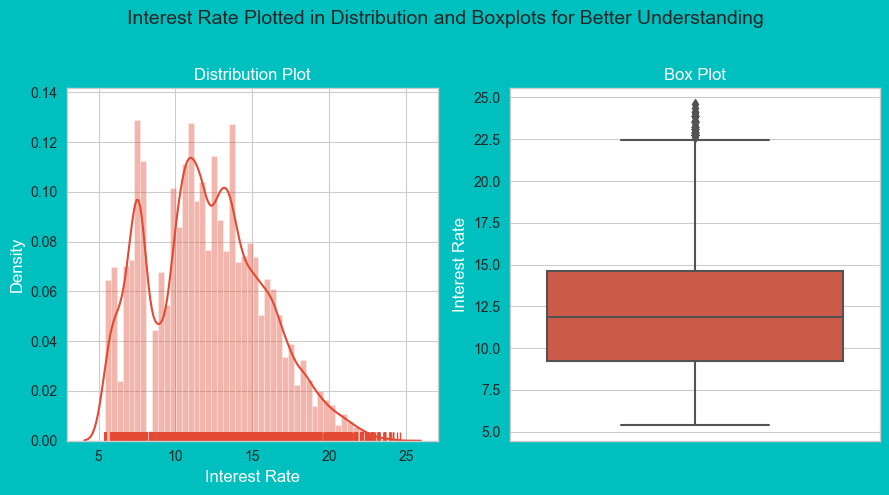

In [70]:
fig = plt.figure(figsize=(9,5), facecolor = 'c')
sns.set_style('whitegrid')

#adding subplots
#distribution plots
ax_1 = fig.add_subplot(121)
sns.distplot(loan_dataset_cp['int_rate_converted'], ax = ax_1, rug = True)
ax_1.set_title('Distribution Plot', fontsize = 12, color = 'w')
ax_1.set_xlabel('Interest Rate', color = 'w')
ax_1.set_ylabel('Density', color = 'w')

#box plots
ax_2 = fig.add_subplot(122)
sns.boxplot(loan_dataset_cp['int_rate_converted'], ax = ax_2)
ax_2.set_title('Box Plot', fontsize = 12, color = 'w')
ax_2.get_xaxis().set_visible(False)
ax_2.set_ylabel('Interest Rate', color = 'w')

fig.suptitle('Interest Rate Plotted in Distribution and Boxplots for Better Understanding', fontsize = 14)
fig.tight_layout(rect = [0,0,1,0.96])

fig.show()

#Observations:

#Using the boxplot as a reference  most of the interest rate are concentrated between 10% and 15%


In [71]:
#let's continue our visualisation
#we want to see the count of people that defaulted and those that didn't
#this time around we are using the loan status column and not the defaulted column
#to grasp a better understanding of what we are doing

In [72]:
s = loan_dataset_cp['loan_status'].value_counts()

In [73]:
tot = s.sum()

In [74]:
#wow, come and see a magic
#reset index transforms a series to a data frame.., just take a look at both of the codes underneath

In [75]:
s

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [76]:
s.reset_index()

,loan_status,count
0,Fully Paid,32950
1,Charged Off,5627
2,Current,1140


In [77]:
for i,v in s.reset_index().iterrows():
    text = str(v['count']) + "/" + str(round((v['count']/tot)*100, 1)) + '%'
    print(text)

32950/83.0%
5627/14.2%
1140/2.9%


In [78]:
text

'1140/2.9%'

In [79]:
#Let's do a count plot of all the loan status alright

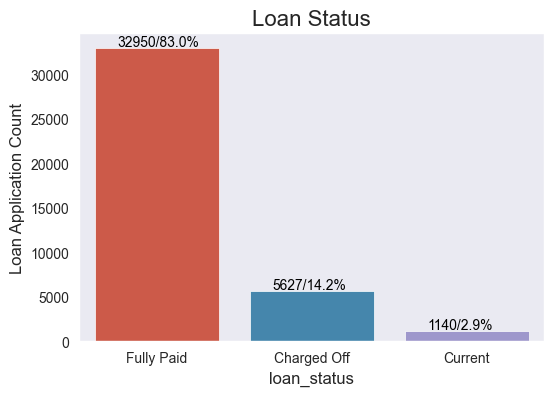

In [80]:
plt.figure(figsize = (6,4))
sns.set_style('dark')
sns.countplot(data = loan_dataset_cp, x = "loan_status")
plt.ylabel("Loan Application Count")
plt.title('Loan Status', fontsize = 16)

s = loan_dataset_cp['loan_status'].value_counts()
tot = s.sum()

for i,v in s.reset_index().iterrows():
    text = str(v['count']) + "/" + str(round((v['count']/tot)*100, 1)) + '%'
    plt.text(i-0.25, v['count'] + 200, text, color = 'k')

plt.show()

<h3>MULTIVARIATE ANALYSIS</h3>

In [81]:
#FIRST OFF - Let's see the correlation between the different columns in the data frame using the corr() in pandas

In [82]:
corr_column_enabled = [column for column in loan_dataset_cp.columns if loan_dataset_cp[column].dtype == 'int64' or loan_dataset_cp[column].dtype == 'float64']

# for column in loan_dataset_cp.columns:
#     if loan_dataset_cp[column].dtype == 'int64' or loan_dataset_cp[column].dtype == 'float64':
#         print(column)

In [83]:
corr_column_enabled

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'pub_rec_bankruptcies',
 'defaulted',
 'int_rate_converted']

In [84]:
loan_dataset_cp_corr_enabled = loan_dataset_cp[['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'pub_rec_bankruptcies',
 'defaulted',
 'int_rate_converted']]

In [85]:
#we could also do this to retrieve the columns with int and float 64 dtype
# loan_dataset_cp.columns[loan_dataset_cp.dtypes == 'object']
#loan_dataset_cp[f[(f == 'int64') | (f== 'float64')].index]
#where f = loan_dataset_cp.dtypes

In [86]:
loan_dataset_cp_corr_enabled.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,defaulted,int_rate_converted
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,0.009229,0.177168,-0.051236,0.317597,0.256442,-0.037180,0.048217,0.309415
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,0.009259,0.175530,-0.052169,0.310392,0.250589,-0.038502,0.045544,0.312619
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.005712,0.163027,-0.053214,0.290797,0.242854,-0.042746,0.026621,0.306657
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,0.009722,0.172812,-0.046532,0.312679,0.230824,-0.034103,0.022589,0.282703
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.033908,0.158200,-0.018689,0.279961,0.235771,-0.016801,-0.041662,0.053185
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,0.001405,0.288045,-0.004621,0.228743,0.229881,0.005691,0.041701,0.111162
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,1.000000,0.091713,0.024802,-0.022381,0.111499,0.016346,0.071717,0.133013
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.091713,1.000000,0.000172,0.288964,0.686635,0.005930,-0.010742,0.010395
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.024802,0.000172,1.000000,-0.061413,-0.023901,0.847305,0.050880,0.097208
revol_bal,0.317597,0.310392,0.290797,0.312679,0.279961,0.228743,-0.022381,0.288964,-0.061413,1.000000,0.313602,-0.049406,0.003369,0.097100


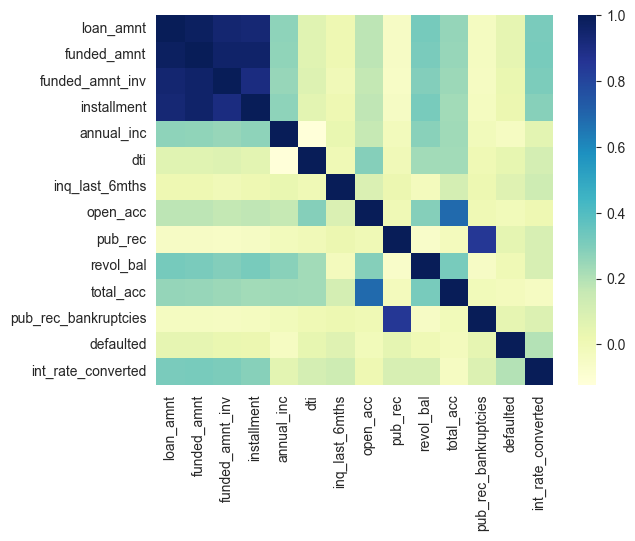

In [87]:
sns.heatmap(loan_dataset_cp_corr_enabled.corr(), cmap = 'YlGnBu')
#other cmaps available are : cmap = 'viridis', cmap = 'plasma', cmap = 'cubehelix', 'coolwarm', 'cool', 'YlGnBu'
plt.show()
#So from the heatmap, we could see that there is a strong correlation between the loan_amnt, funded_amnt,
#funded_amnt_inv, and investment

#there is also a strong relationship between public_rec and public_rec bankruptcies

In [88]:
#LET'S FIGURE OUT THE COUNT OF NULL VALUES IN OUR DATAFRAME

In [89]:
loan_dataset_cp.isnull().sum()
#we could have also done loan_dataset_cp.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_pymnt_d              71
pub_rec_bankruptcies     697
defaulted                  0
int_rate_converted         0
dtype: int64

In [90]:
a = (loan_dataset_cp.isnull().sum()/loan_dataset_cp.shape[0]) * 100
#the percentage of null values in the dataframe

In [91]:
b = pd.DataFrame(a[a>0.05], columns = ['Percentage_null_values'])

In [92]:
b.sort_values(by = 'Percentage_null_values', ascending = False)

,Percentage_null_values
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
revol_util,0.125891


In [93]:
loan_dataset_cp.columns[loan_dataset_cp.dtypes == 'object'] #this is a life saver that's all i can say

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'revol_util', 'last_pymnt_d'],
      dtype='object')

In [94]:
loan_dataset_cp.term.value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

### Unique values in each categorical feature

In [95]:
#let's get a count of the unique not numeric features in our data set

In [96]:
for i in loan_dataset_cp.columns[loan_dataset_cp.dtypes == 'object']:
    print(loan_dataset_cp[i].value_counts())
    print('--------------------------------\n-----------------------------------')

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64
--------------------------------
-----------------------------------
int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64
--------------------------------
-----------------------------------
grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
--------------------------------
-----------------------------------
sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dty

In [97]:
len(loan_dataset_cp.annual_inc.values)

39717

In [98]:
bins = [0, 30000, 60000, 100000, 500000]

In [99]:
group_names = ['0-30K', '30-60K', '60-100K', '100K+']

In [100]:
cat = pd.cut(loan_dataset_cp.annual_inc.values, bins, labels = group_names)

In [101]:
cat

['0-30K', '0-30K', '0-30K', '30-60K', '60-100K', ..., '100K+', '0-30K', '60-100K', '100K+', '0-30K']
Length: 39717
Categories (4, object): ['0-30K' < '30-60K' < '60-100K' < '100K+']

In [102]:
pd.value_counts(cat)

30-60K     16861
60-100K    12545
100K+       5620
0-30K       4624
Name: count, dtype: int64

In [103]:
#now this is very good, but what we actually want is a tag to the dataset.., more like a feature engineering but this is very good alright.., let's check the effectiveness of our results

In [104]:
# loan_dataset_cp.annual_inc.quantile(q=1)

# quantile it might be beneficial

In [105]:
def classify_annual_inc(x):
    if x >0 and x <= 30000:
        return '0-30K'
    elif x > 30000 and x <= 60000:
        return '30-60K'
    elif x > 60000 and x <= 100000:
        return '60-100K'
    else:
        return '100K+'

In [106]:
loan_dataset_cp.annual_inc.dtype

dtype('float64')

In [107]:
loan_dataset_cp['binned_annual_inc'] = loan_dataset_cp['annual_inc'].astype(int).apply(classify_annual_inc)

In [108]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted,int_rate_converted,binned_annual_inc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0,10.65,0-30K
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1,15.27,0-30K
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0,15.96,0-30K
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0,13.49,30-60K
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0,12.69,60-100K


In [109]:
#let's use cross tab to get the number of people that falls within the annual_inc category and defaulted

In [110]:
pd.crosstab(loan_dataset_cp['binned_annual_inc'], loan_dataset_cp['defaulted'])

defaulted,0,1
binned_annual_inc,,
0-30K,3785,839
100K+,5095,592
30-60K,14220,2641
60-100K,10990,1555


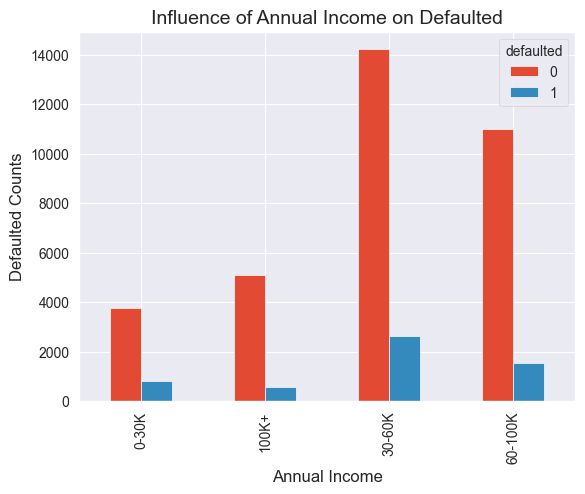

In [111]:
#let's plot it
pd.crosstab(loan_dataset_cp['binned_annual_inc'], loan_dataset_cp['defaulted']).plot(kind = 'bar')
plt.title("Influence of Annual Income on Defaulted", fontsize = 14)
plt.xlabel("Annual Income")
plt.ylabel("Defaulted Counts")
plt.grid()
plt.show()

In [112]:
df_annual_inc_defaulters = loan_dataset_cp[loan_dataset_cp.defaulted == 1].groupby('binned_annual_inc')['defaulted'].count().reset_index()

In [113]:
df_annual_inc_defaulted = loan_dataset_cp.groupby('binned_annual_inc')['defaulted'].count().reset_index()

In [114]:
df_annual_inc_full = pd.merge(df_annual_inc_defaulters, df_annual_inc_defaulted, 
         #left_on = 'binned_annual_inc', right_on = 'binned_annual_inc', 
         on = 'binned_annual_inc',
         how = 'left',
         suffixes = ('_yes', '_yes_and_no'))

In [115]:
df_annual_inc_full['Ratio'] = (df_annual_inc_full.defaulted_yes/df_annual_inc_full.defaulted_yes_and_no)

In [116]:
df_annual_inc_full.Ratio = df_annual_inc_full.Ratio.transform(lambda x: x*100)

In [117]:
df_annual_inc_full

,binned_annual_inc,defaulted_yes,defaulted_yes_and_no,Ratio
0,0-30K,839,4624,18.144464
1,100K+,592,5687,10.409706
2,30-60K,2641,16861,15.663365
3,60-100K,1555,12545,12.395377


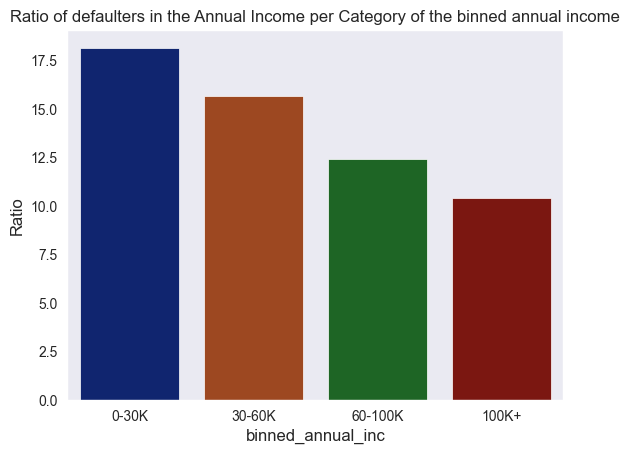

In [118]:
#let's see a  barplot of the binned_annual_inc and the ratio

plt.figure()
sns.set_style('dark')
sns.barplot(data = df_annual_inc_full.sort_values(by = 'Ratio', ascending = False), x = 'binned_annual_inc', y = 'Ratio', palette = 'dark')
plt.title("Ratio of defaulters in the Annual Income per Category of the binned annual income", fontsize = 12)
plt.show()

In [119]:
#alright.., let's apply some binning on the funding amount.
#let's start by taking a look at the funded amount column's description

In [120]:
def classify_funded_amount(x):
    if x > 0 and x < 10000:
        return '0-10K'
    elif x >= 10000 and x < 20000:
        return '10-20K'
    else:
        return '20K+'
    

In [121]:
loan_dataset_cp['funded_amount_classification'] = loan_dataset_cp['funded_amnt'].apply(classify_funded_amount)

In [122]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted,int_rate_converted,binned_annual_inc,funded_amount_classification
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0,10.65,0-30K,0-10K
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1,15.27,0-30K,0-10K
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0,15.96,0-30K,0-10K
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0,13.49,30-60K,10-20K
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0,12.69,60-100K,0-10K


In [123]:
#alright..., now let's find out the ratio of people that defaulted based on the funded amount alright

In [124]:
df_funded_amnt_defaulters = loan_dataset_cp[loan_dataset_cp.defaulted == 1].groupby('funded_amount_classification')['defaulted'].count().reset_index()

In [125]:
df_funded_amnt_defaulted = loan_dataset_cp.groupby('funded_amount_classification')['defaulted'].count().reset_index()

In [126]:
df_funded_amnt_defaulted

,funded_amount_classification,defaulted
0,0-10K,20071
1,10-20K,14060
2,20K+,5586


In [127]:
df_funded_amnt_full = pd.merge(df_funded_amnt_defaulters, df_funded_amnt_defaulted, 
         on = 'funded_amount_classification',
         how = 'left',
         suffixes = ('_yes', '_yes_and_no'))

In [128]:
df_funded_amnt_full

,funded_amount_classification,defaulted_yes,defaulted_yes_and_no
0,0-10K,2647,20071
1,10-20K,2013,14060
2,20K+,967,5586


In [129]:
df_funded_amnt_full['Ratio'] = (df_funded_amnt_full.defaulted_yes/df_funded_amnt_full.defaulted_yes_and_no).transform(lambda x: x * 100)

In [130]:
df_funded_amnt_full

,funded_amount_classification,defaulted_yes,defaulted_yes_and_no,Ratio
0,0-10K,2647,20071,13.188182
1,10-20K,2013,14060,14.317212
2,20K+,967,5586,17.311135


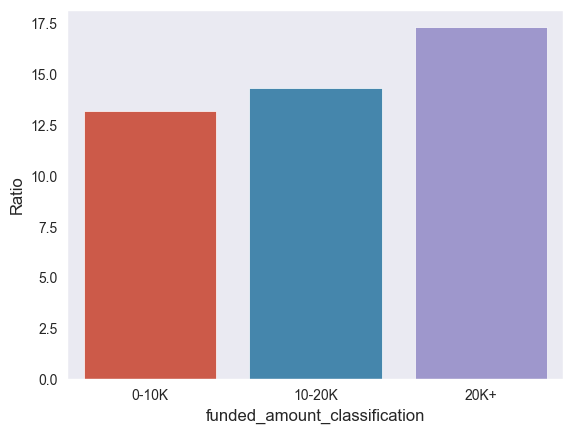

In [131]:
#let's plot and see the visualisation
sns.barplot(data = df_funded_amnt_full, x = 'funded_amount_classification', y = 'Ratio')
plt.show()

In [132]:
#let's get a kind of a more complext visualisation
#in each category of the funded amount, let's get the annual income those folks actually received..
#won't that be nicer or should i say better


In [133]:
fmnt_ainc_defaulters = loan_dataset_cp[loan_dataset_cp.defaulted == 1].groupby(['funded_amount_classification', 'binned_annual_inc'])['defaulted'].count().reset_index()

In [134]:
fmnt_ainc_defaulted = loan_dataset_cp.groupby(['funded_amount_classification', 'binned_annual_inc'])['defaulted'].count().reset_index()

In [135]:
fmnt_ainc_full = pd.merge(fmnt_ainc_defaulters, fmnt_ainc_defaulted, on = ['funded_amount_classification', 'binned_annual_inc'], how = 'left', suffixes= ('_yes', '_yes_and_no'))

In [136]:
fmnt_ainc_full = fmnt_ainc_full.assign(Ratio = fmnt_ainc_full.defaulted_yes/fmnt_ainc_full.defaulted_yes_and_no)

In [137]:
fmnt_ainc_full

,funded_amount_classification,binned_annual_inc,defaulted_yes,defaulted_yes_and_no,Ratio
0,0-10K,0-30K,693,4008,0.172904
1,0-10K,100K+,127,1510,0.084106
2,0-10K,30-60K,1338,9619,0.139100
3,0-10K,60-100K,489,4934,0.099108
4,10-20K,0-30K,144,611,0.235679
5,10-20K,100K+,197,2137,0.092185
6,10-20K,30-60K,1065,6188,0.172107
7,10-20K,60-100K,607,5124,0.118462
8,20K+,0-30K,2,5,0.400000
9,20K+,100K+,268,2040,0.131373


In [138]:
#this is great stuff.., now let's proceed and see what we have alright...., let's move

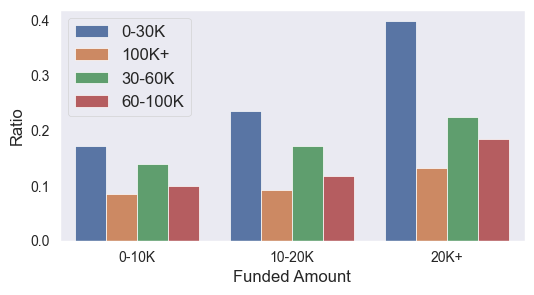

In [139]:
plt.figure(figsize=(6,3))
sns.barplot(data = fmnt_ainc_full, x = 'funded_amount_classification', y = 'Ratio', 
            hue = 'binned_annual_inc', palette= 'deep'
           )
plt.xlabel('Funded Amount', fontsize = 12)
plt.ylabel('Ratio', fontsize = 12)
plt.legend(fontsize = 12)
plt.rc('xtick', labelsize = 10)

#look more of plt.xticks and plt.yticks..., mine is kind of like a number
plt.show()

In [140]:
loan_dataset_cp[loan_dataset_cp.columns[(loan_dataset_cp.dtypes == 'int64')|(loan_dataset_cp.dtypes == 'float64')]].groupby('defaulted').mean().round()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,int_rate_converted
defaulted,,,,,,,,,,,,,
0,11073.0,10815.0,10320.0,323.0,70049.0,13.0,1.0,9.0,0.0,13361.0,22.0,0.0,12.0
1,12104.0,11753.0,10865.0,336.0,62427.0,14.0,1.0,9.0,0.0,13514.0,21.0,0.0,14.0


In [141]:
loan_dataset_cp

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted,int_rate_converted,binned_annual_inc,funded_amount_classification
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0,10.65,0-30K,0-10K
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1,15.27,0-30K,0-10K
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0,15.96,0-30K,0-10K
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0,13.49,30-60K,10-20K
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0,12.69,60-100K,0-10K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0,13,0,7274,13.10%,40,Jul-10,NaN,0,8.07,100K+,0-10K
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,1,6,0,8847,26.90%,9,Jul-10,NaN,0,10.28,0-30K,0-10K
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0,11,0,9698,19.40%,20,Apr-08,NaN,0,8.07,60-100K,0-10K
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0,17,0,85607,0.70%,26,Jan-08,NaN,0,7.43,100K+,0-10K


In [142]:
#is there any significant difference between the requested loan and what was disbursed
#calculated in percentage
print(((loan_dataset_cp.loan_amnt - loan_dataset_cp.funded_amnt)/(loan_dataset_cp.loan_amnt)*100).sort_values(ascending = False).head())
print(((loan_dataset_cp.loan_amnt - loan_dataset_cp.funded_amnt)/(loan_dataset_cp.loan_amnt)*100).sort_values(ascending = False).tail())

#and for some cases what what was disbursed was little compared to what was requested and vice versa

23556    89.875000
23296    89.750000
23288    88.928571
23416    86.750000
23337    84.750000
dtype: float64
13490    0.0
13491    0.0
13492    0.0
13493    0.0
39716    0.0
dtype: float64


### CORRELATION BETWEEN THE GRADE OF LOANS AND DEFAULTED

<Figure size 640x480 with 0 Axes>

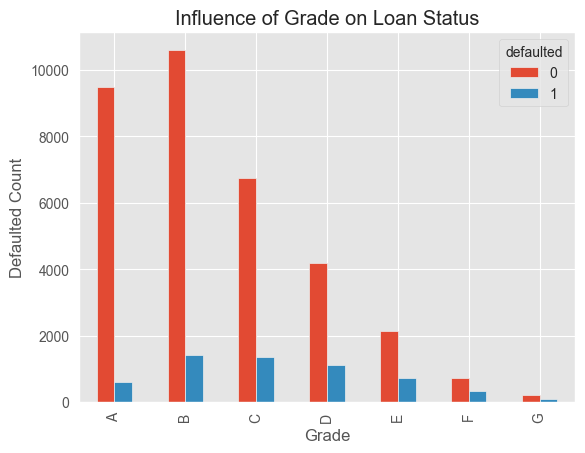

In [143]:
plt.figure()
plt.style.use('ggplot')
ct = pd.crosstab(loan_dataset_cp['grade'], loan_dataset_cp['defaulted'])
ct.plot(kind = 'bar')
plt.title('Influence of Grade on Loan Status')
plt.xlabel('Grade')
plt.ylabel('Defaulted Count')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.show()

In [144]:
ct = ct.assign(ratio = (ct[1]/ct[0])*100)

In [145]:
ct

defaulted,0,1,ratio
grade,,,
A,9483,602,6.348202
B,10595,1425,13.449740
C,6751,1347,19.952600
D,4189,1118,26.688947
E,2127,715,33.615421
F,730,319,43.698630
G,215,101,46.976744


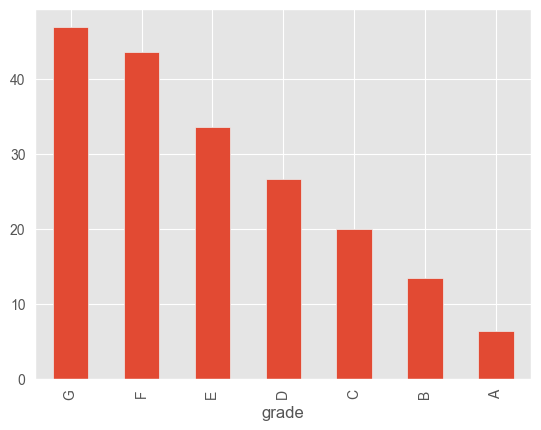

In [146]:
ct.ratio.sort_values(ascending = False).plot(kind = 'bar')
plt.show()
#from this visualisation it is evident that people defaulted more for a loan type of G, F, E and in that order

<Figure size 640x480 with 0 Axes>

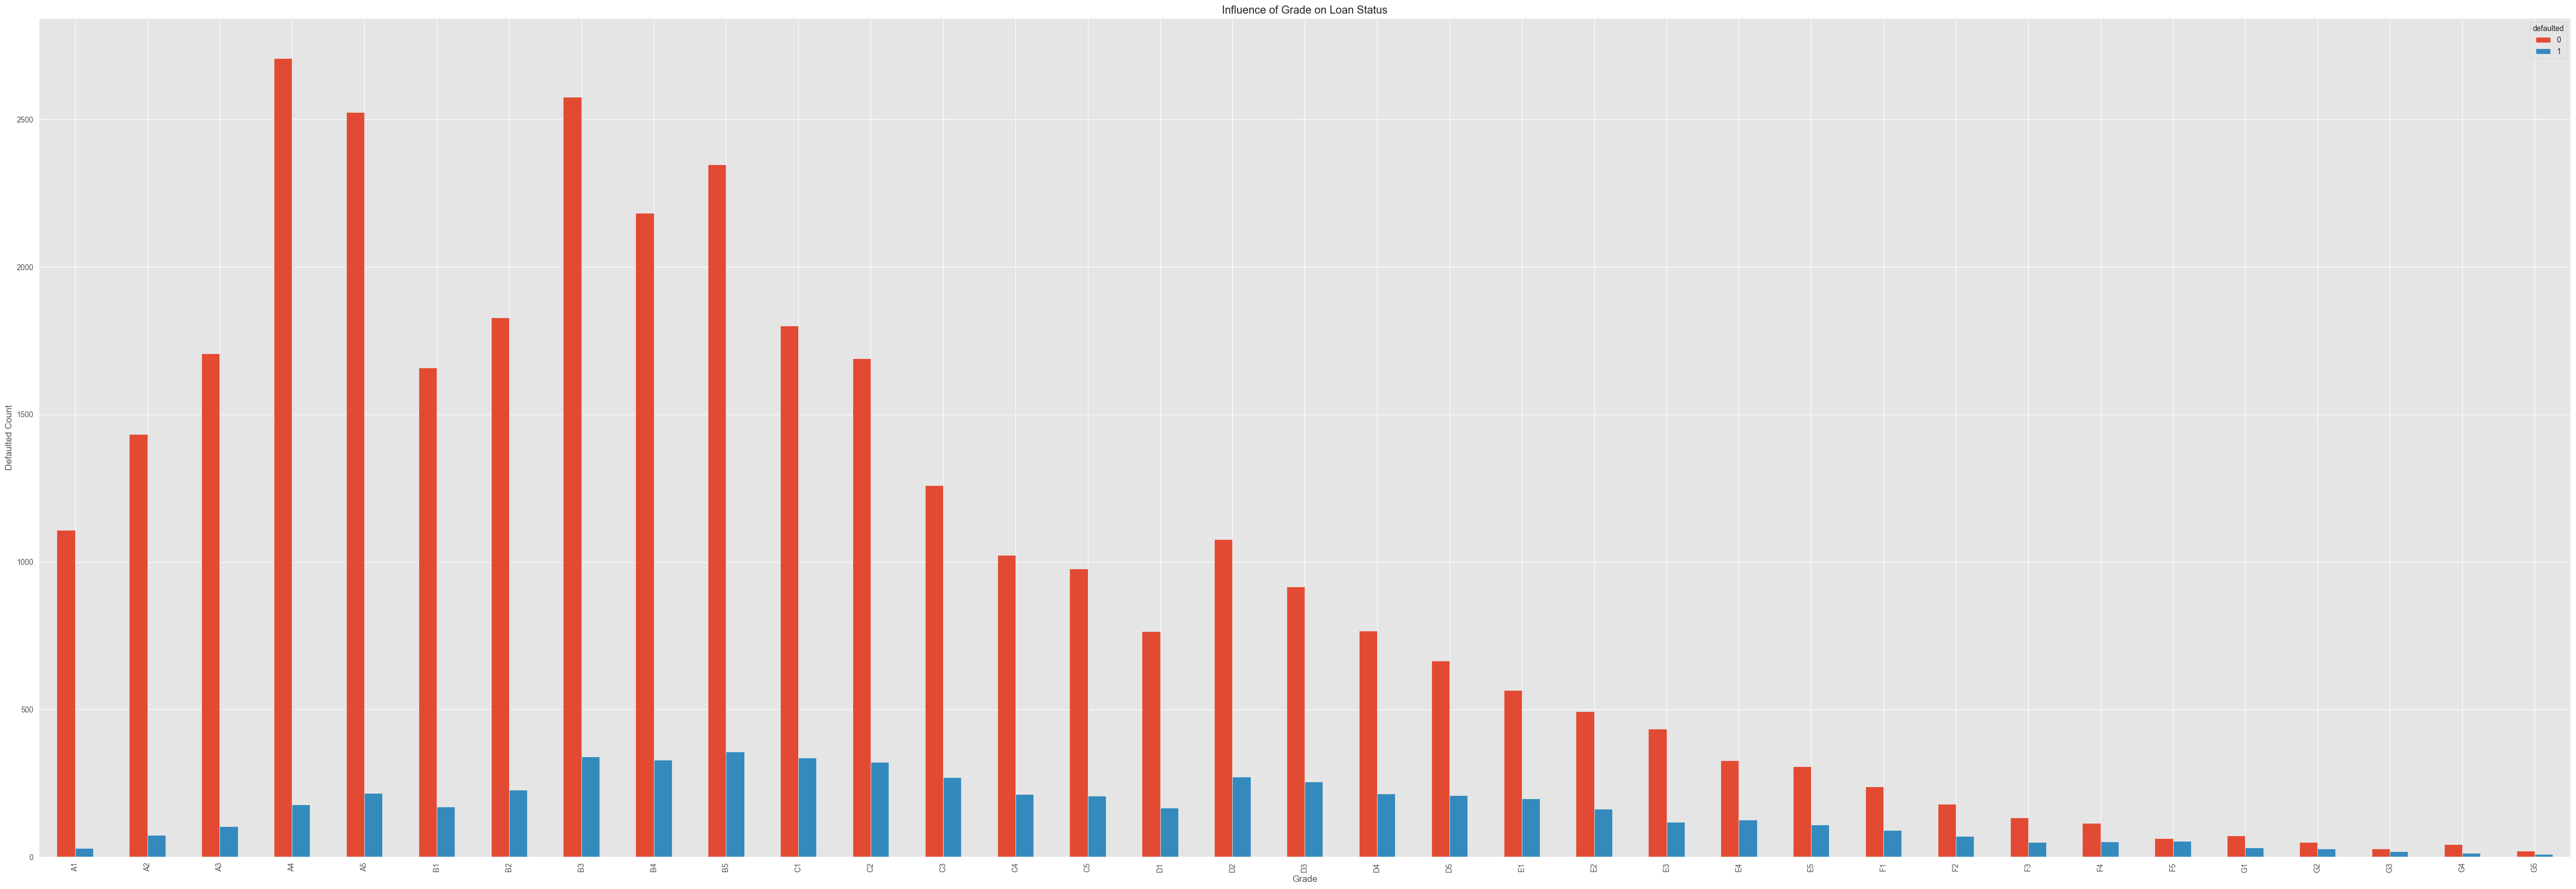

In [147]:
#what about the subgrades.., let's take a look at those..
plt.figure()
plt.style.use('ggplot')
ct_sub = pd.crosstab(loan_dataset_cp['sub_grade'], loan_dataset_cp['defaulted'])
ct_sub.plot(kind = 'bar', figsize = (60,20))
plt.title('Influence of Grade on Loan Status')
plt.xlabel('Grade')
plt.ylabel('Defaulted Count')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.show()

In [148]:
#we can take a look at them and understand what's actually the ratio

In [149]:
ct_sub['ratio'] = (ct_sub[1]/ct_sub[0] * 100).round(2)

In [150]:
ct_sub

defaulted,0,1,ratio
sub_grade,,,
A1,1109,30,2.71
A2,1434,74,5.16
A3,1707,103,6.03
A4,2708,178,6.57
A5,2525,217,8.59
B1,1659,171,10.31
B2,1829,228,12.47
B3,2576,341,13.24
B4,2183,329,15.07


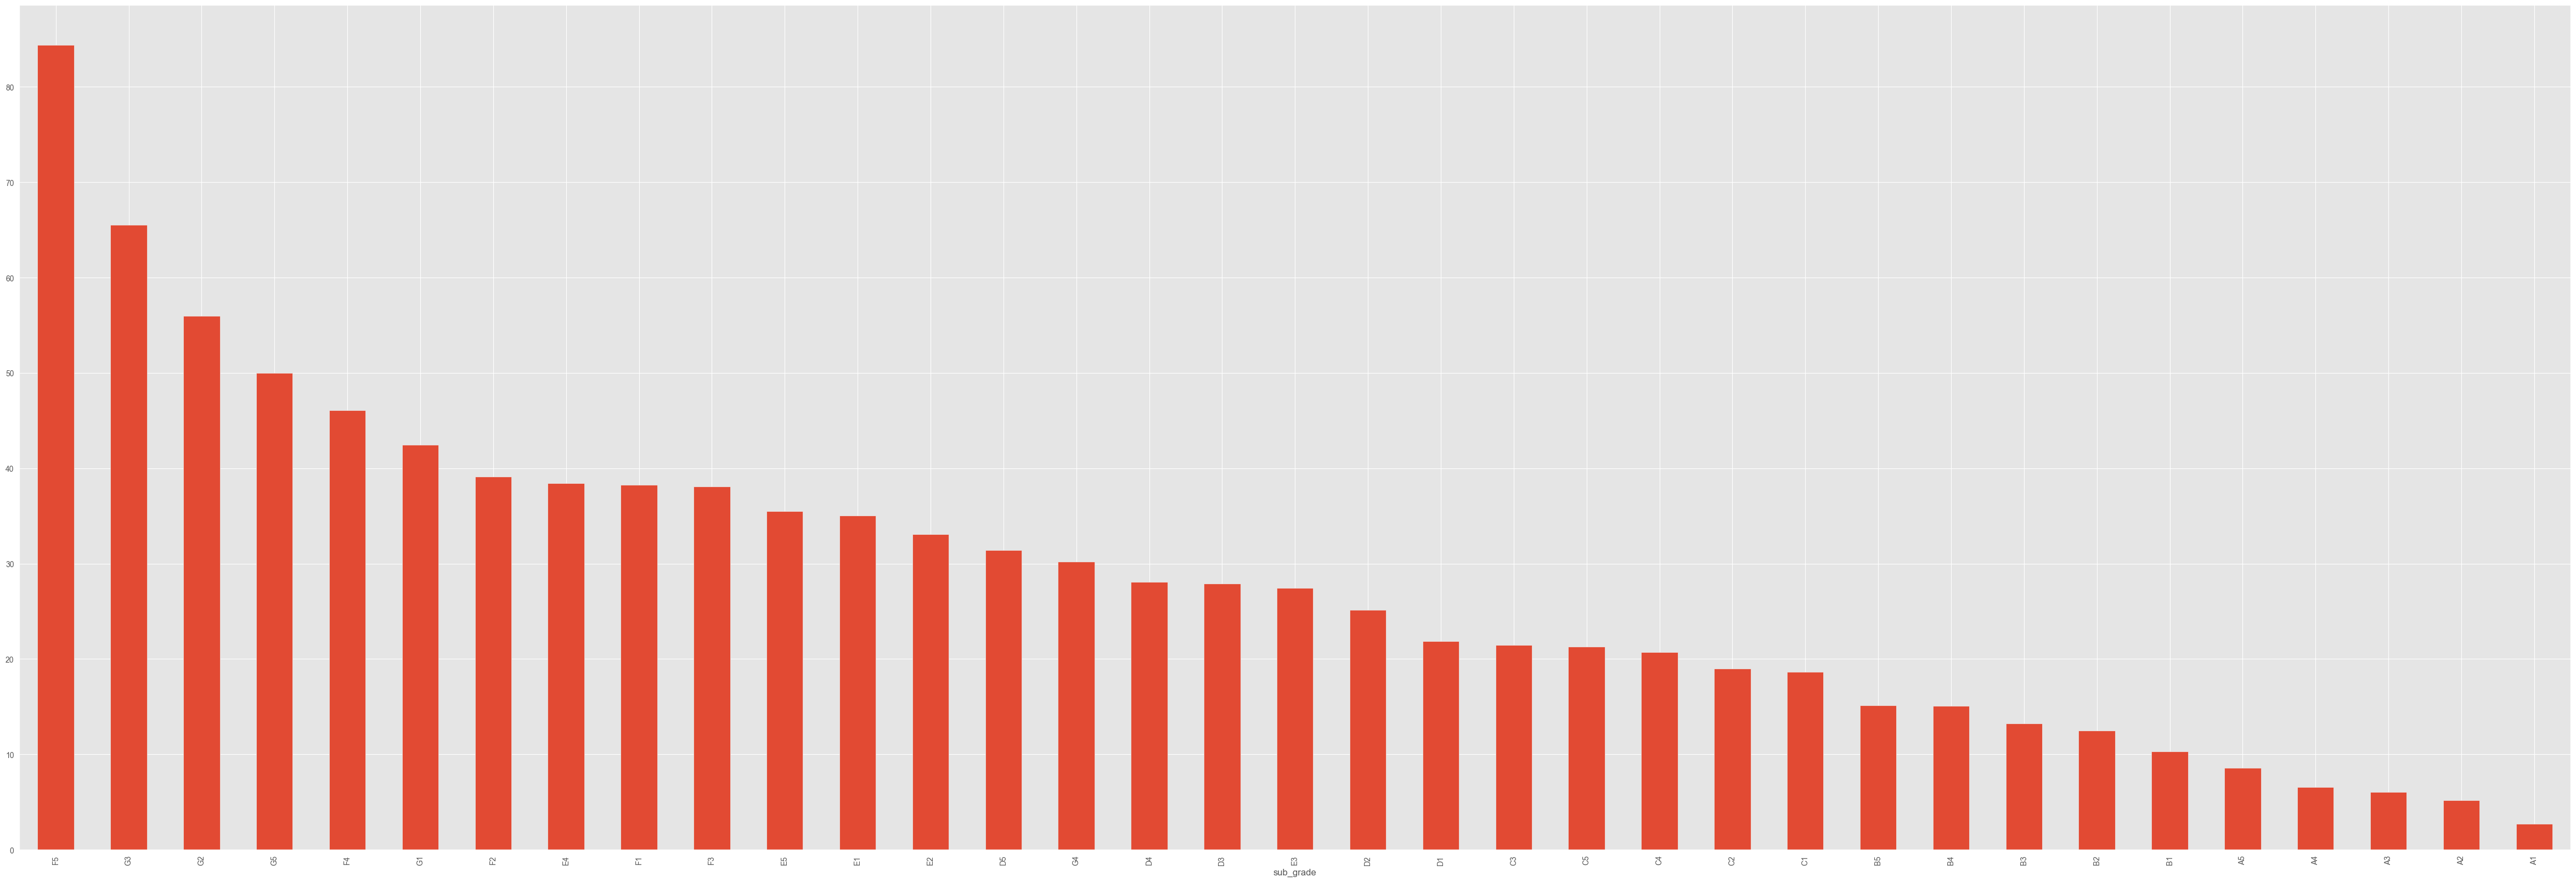

In [151]:
ct_sub.ratio.sort_values(ascending = False).plot(kind = 'bar', figsize = (60,20))
plt.show()

#from the plot it is evident that loan takers of F5 loans have the highest default rate alright...

### RELATIONSHIP BETWEEN THE LOAN STATUS AND STATE

In [152]:
loan_dataset_cp.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_d', 'pub_rec_bankruptcies', 'defaulted',
       'int_rate_converted', 'binned_annual_inc',
       'funded_amount_classification'],
      dtype='object')

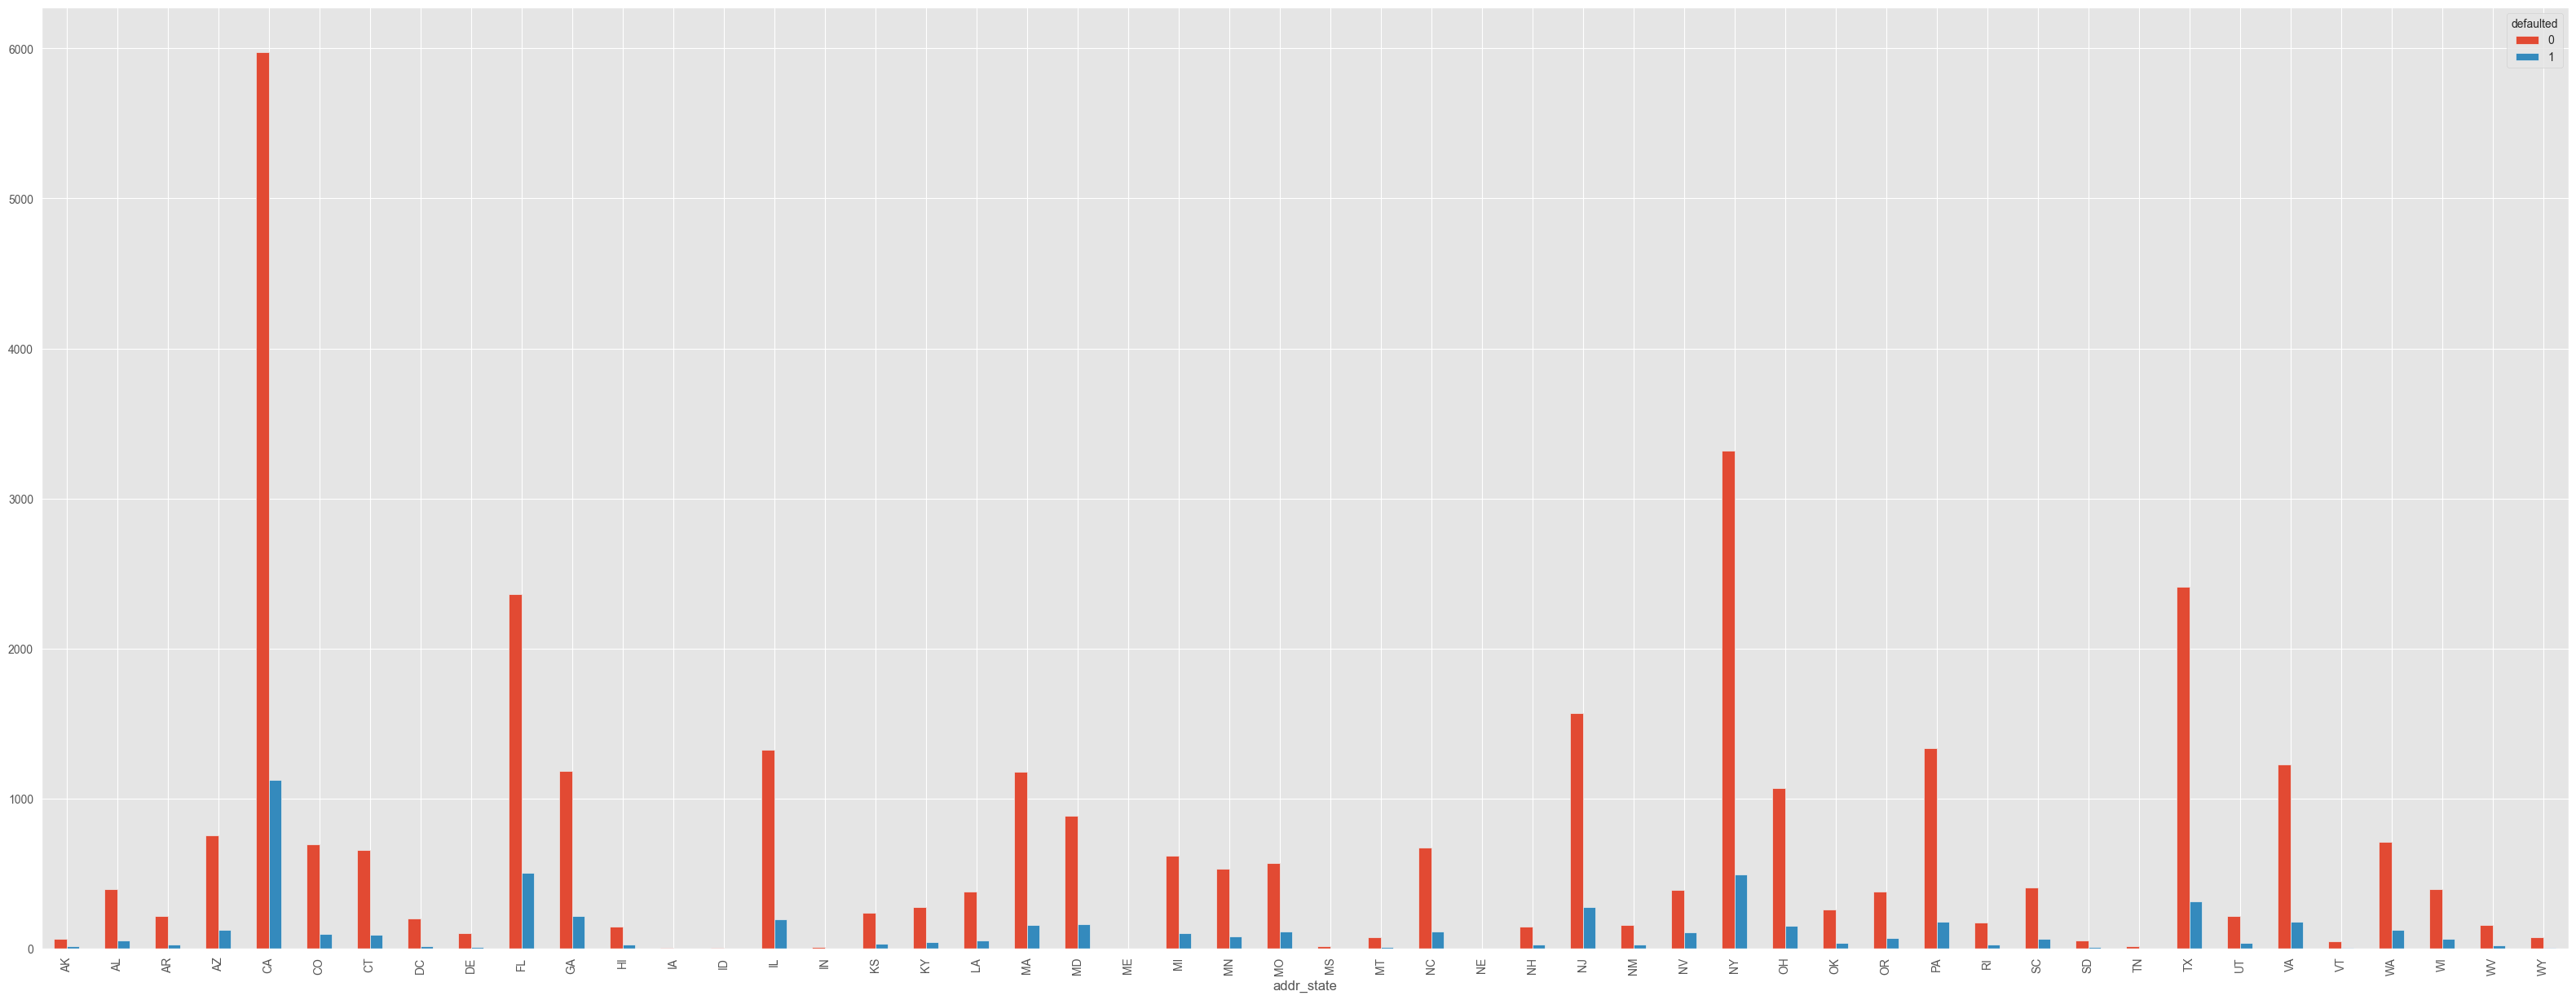

In [153]:
ct_state = pd.crosstab(loan_dataset_cp.addr_state, loan_dataset_cp.defaulted)
ct_state.plot(kind = 'bar', figsize = (40,15))
plt.show()

In [154]:
#what state have the highest default ratio.., we can see that.. let's do a reanalysis
ct_state['ratio'] = (ct_state[1]/ct_state[0])*100

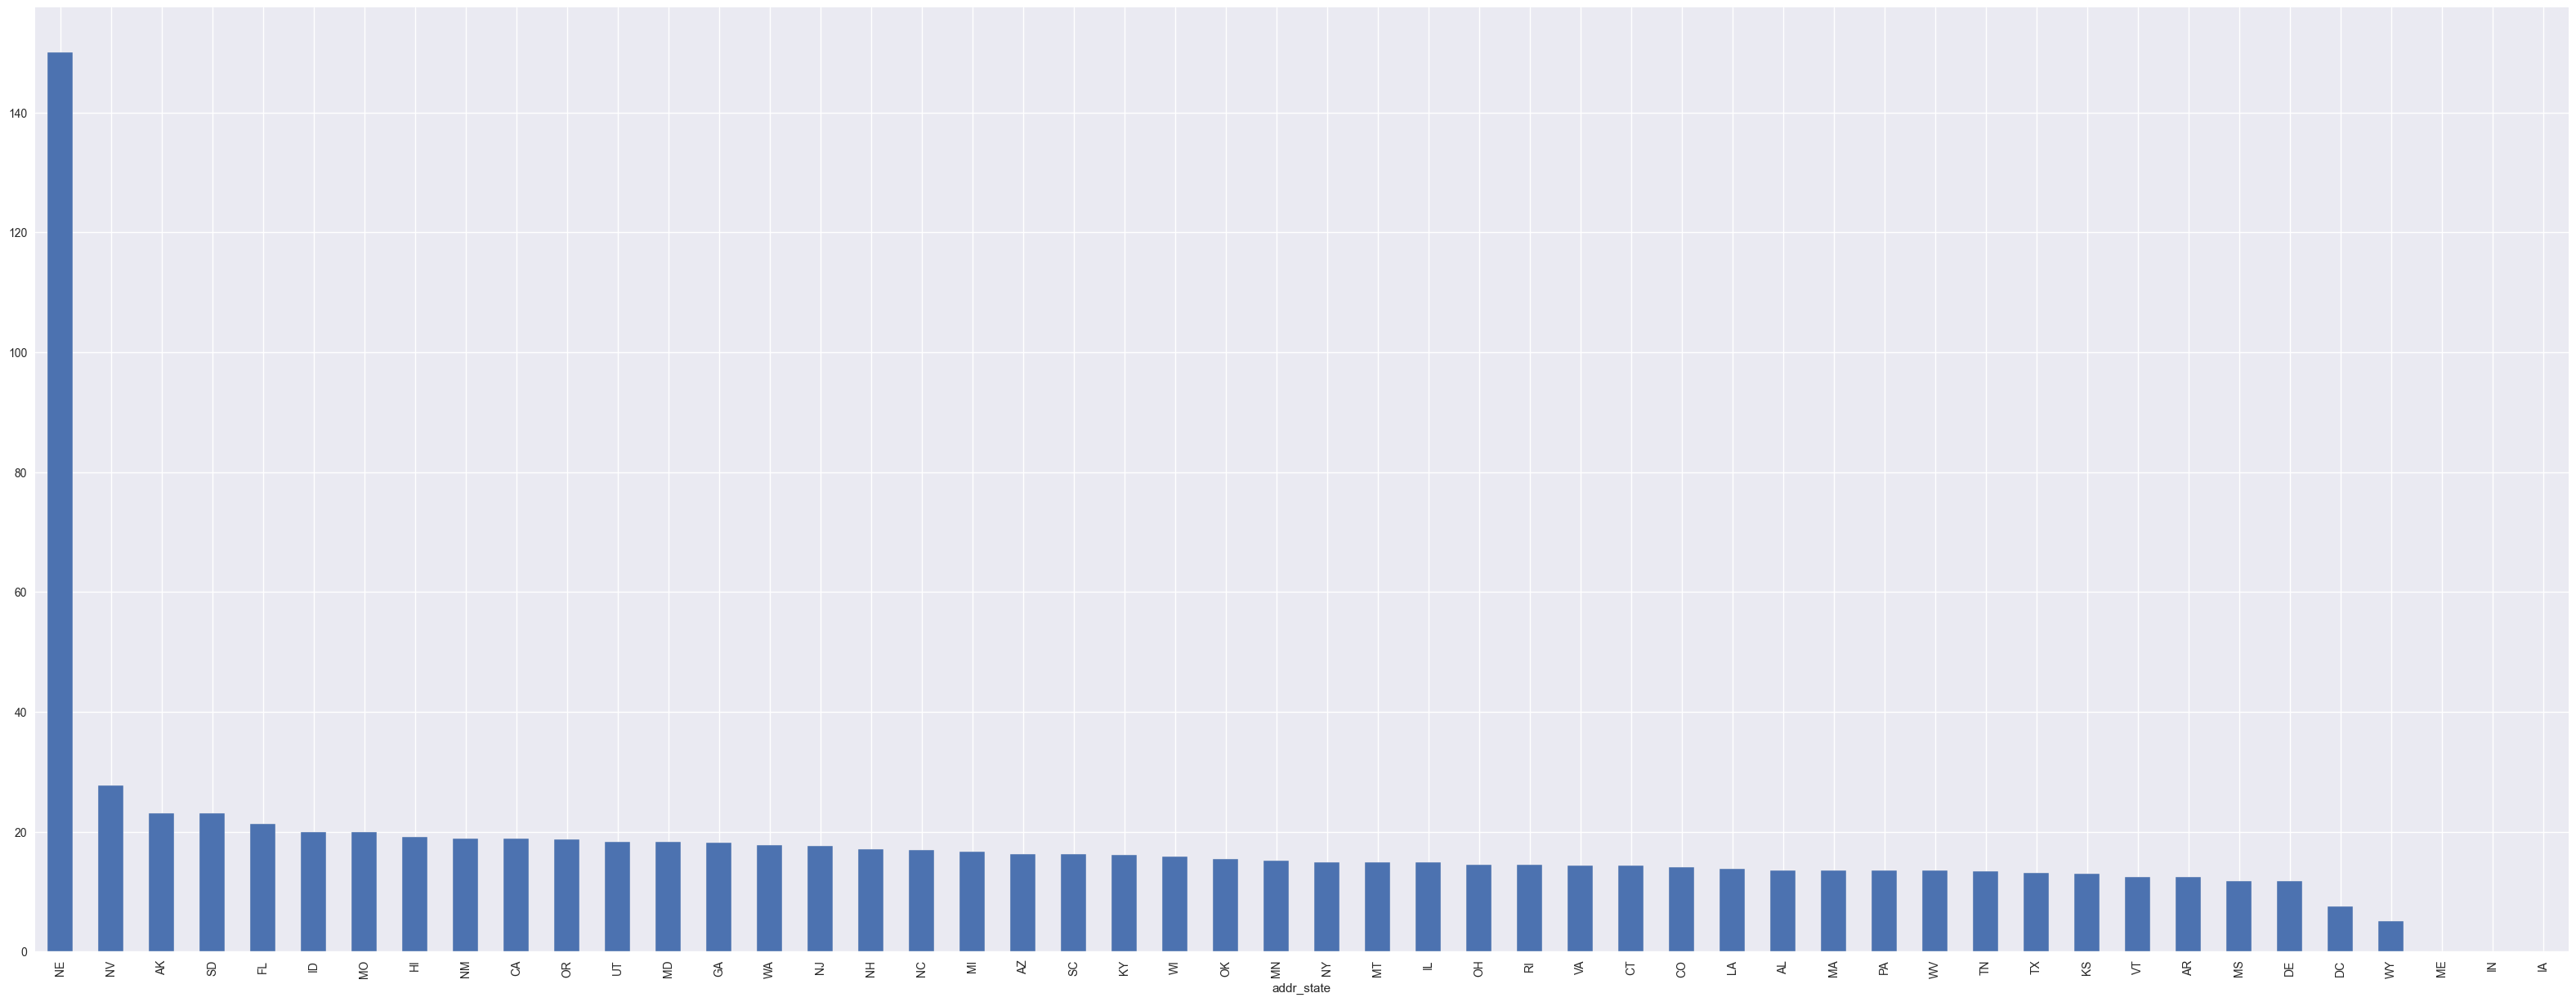

In [155]:
plt.figure()
plt.style.use('seaborn')
ct_state.ratio.sort_values(ascending = False).plot(kind = 'bar', figsize = (40,15))
plt.show()

In [156]:
ct_state.sort_values(by = 'ratio', ascending = False).head()

defaulted,0,1,ratio
addr_state,,,
NE,2,3,150.000000
NV,389,108,27.763496
AK,65,15,23.076923
SD,52,12,23.076923
FL,2362,504,21.337849


In [157]:
#Let's PLot against ratio of default and the term.. i.e. the months of loan collected

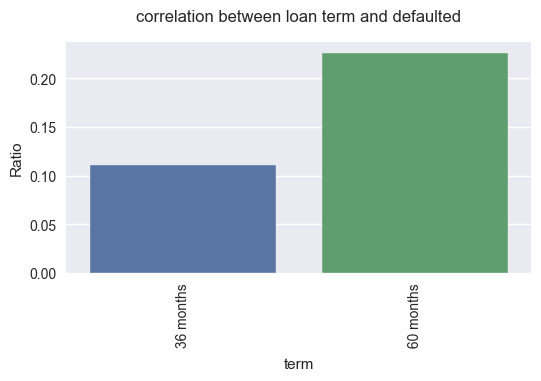

In [158]:
term_defaulters_df = loan_dataset_cp[loan_dataset_cp.defaulted == 1].groupby('term')['defaulted'].count().reset_index()
term_defaulted_df = loan_dataset_cp.groupby('term')['defaulted'].count().reset_index()
term_defaulted_full = pd.merge(term_defaulters_df, term_defaulted_df, on = 'term', suffixes = ('_yes', '_yes_and_no'))
term_defaulted_full['Ratio'] = term_defaulted_full['defaulted_yes']/term_defaulted_full['defaulted_yes_and_no']

plt.figure(figsize = (6,3))
sns.barplot(data = term_defaulted_full, x = 'term', y = 'Ratio')
plt.title('correlation between loan term and defaulted', pad = 15)
plt.xticks(rotation = 90)
plt.show()

#observations 60 months loans have higher defaults that 36 months loan

In [159]:
#let's see if there is any relationship between the job title of the loan seekers and their default ratio

In [160]:
loan_dataset_cp['emp_title'].value_counts().head(20)

emp_title
US Army                    134
Bank of America            109
IBM                         66
AT&T                        59
Kaiser Permanente           56
Wells Fargo                 54
USAF                        54
UPS                         53
US Air Force                52
Walmart                     45
Lockheed Martin             44
United States Air Force     42
State of California         42
U.S. Army                   41
Verizon Wireless            40
Self Employed               40
USPS                        39
US ARMY                     39
Walgreens                   38
JP Morgan Chase             37
Name: count, dtype: int64

In [161]:
loan_dataset_cp['emp_title'] = loan_dataset_cp['emp_title'].str.upper()

In [162]:
#we need the list of the defaulters and the list of all the defaulted with regards to the emp_title
employers = loan_dataset_cp.groupby('emp_title')['defaulted'].count()
employers = employers.reset_index().sort_values('defaulted', ascending = False)
employers_defaulted = loan_dataset_cp.groupby('emp_title')['defaulted'].sum()
employers_full = pd.merge(employers, employers_defaulted, on = 'emp_title')
employers_full.rename(columns = {'defaulted_x':'Totals', 'defaulted_y':'defaulted'}, inplace= True)
employers_full['Default Ratio'] = round((employers_full['defaulted']/employers_full['Totals'])*100, 4)
employers_full[employers_full.Totals > 20].sort_values(by = 'Default Ratio', ascending = False)

#a very good observation is that staffs from UPS and WALMART who had taken loan more than 20 times have the 
#highest defaults

,emp_title,Totals,defaulted,Default Ratio
8,UPS,63,17,26.9841
47,WAL-MART,24,6,25.0000
2,WALMART,81,20,24.6914
37,RETIRED,33,8,24.2424
58,INTERNAL REVENUE SERVICE,21,5,23.8095
27,UNITED STATES POSTAL SERVICE,38,9,23.6842
54,US BANK,22,5,22.7273
19,US POSTAL SERVICE,45,10,22.2222
30,SELF-EMPLOYED,36,8,22.2222
50,SPRINT,23,5,21.7391


In [163]:
#LET'S SEE THE RELATIONSHIP BETWEEN VERIFICATION STATUS AND THE DEFAULTS

<Figure size 800x550 with 0 Axes>

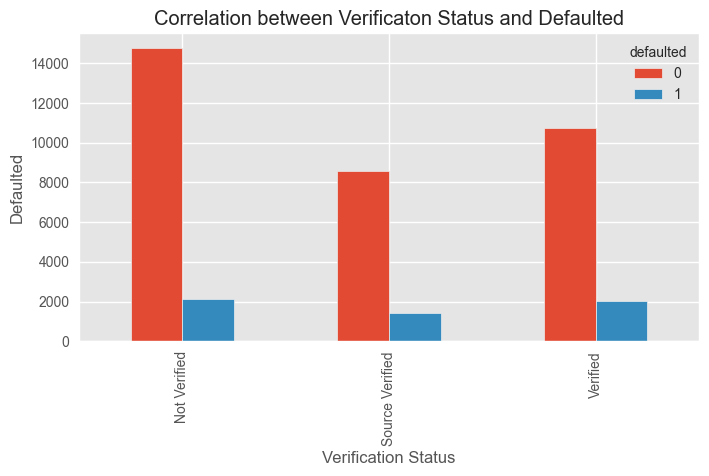

In [164]:
plt.figure()
plt.style.use('ggplot')
ver_def = pd.crosstab(loan_dataset_cp.verification_status, loan_dataset_cp.defaulted)
ver_def.plot(kind = 'bar', figsize = (8,4))
plt.title('Correlation between Verificaton Status and Defaulted')
plt.xlabel('Verification Status')
plt.ylabel('Defaulted')
plt.show()

In [165]:
ver_def = ver_def.assign(Ratio = (ver_def[1]/ver_def[0])*100)

In [166]:
ver_def = ver_def.sort_values(by = 'Ratio', ascending = False)

In [167]:
#let's see the visualisation

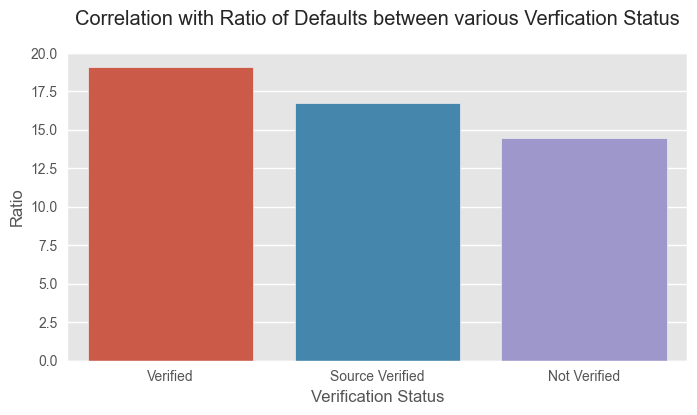

In [168]:
plt.figure(figsize = (8,4))
sns.barplot(data = ver_def, x = ver_def.index, y = ver_def['Ratio'])

plt.title('Correlation with Ratio of Defaults between various Verfication Status', pad = 20)
plt.xlabel('Verification Status')
plt.ylabel('Ratio')
plt.show()

#so from the plot, it is clear that those that were verfied defaulted more on their loans

#### Relationship between month name to check for a cyclical influence

In [169]:
from datetime import datetime

In [170]:
loan_dataset_cp['last_pymnt_d'] = pd.to_datetime(loan_dataset_cp['last_pymnt_d'], format = '%b-%y')

In [171]:
loan_dataset_cp['month_last_pymnt'] = loan_dataset_cp['last_pymnt_d'].dt.strftime('%b')

In [172]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

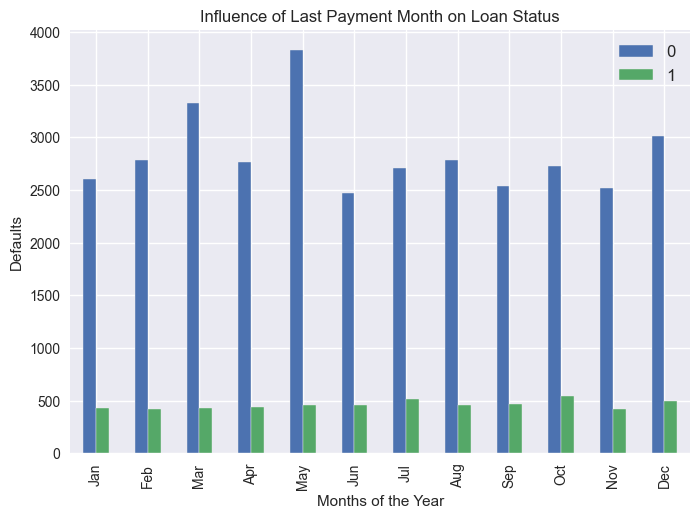

In [173]:
plt.style.use('seaborn')
pd.crosstab(loan_dataset_cp['month_last_pymnt'], loan_dataset_cp['defaulted']).reindex(month_names).plot(kind = 'bar')
plt.title('Influence of Last Payment Month on Loan Status')
plt.xlabel("Months of the Year")
plt.ylabel("Defaults")
plt.legend(fontsize = 12)
plt.show()

#observation is that the months of March and May have the highest loan intakes
#and the defaults were significantly low